In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Maruti_Swift_Sales_2016-2022.csv')

In [3]:
df.head()

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355


In [4]:
df.tail()

,Month,Sales
70,11-01-2021,14568
71,12-01-2021,15661
72,01-01-2022,19108
73,02-01-2022,19202
74,03-01-2022,13623


<AxesSubplot:>

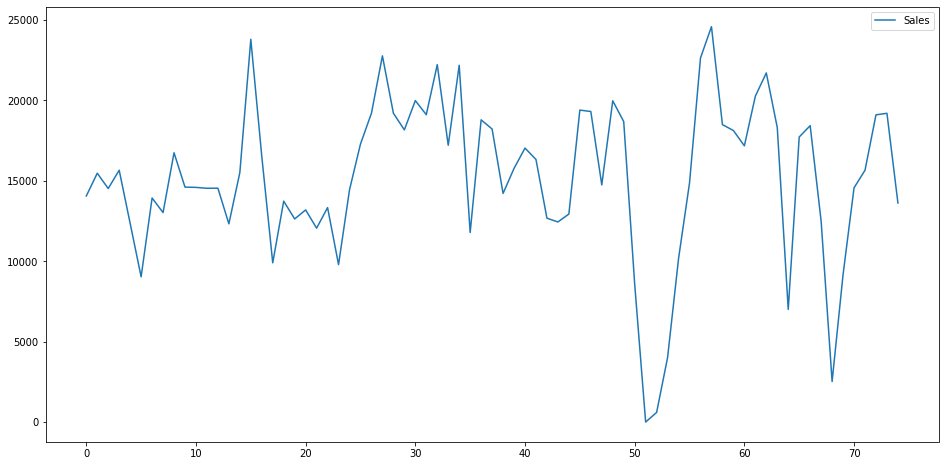

In [5]:
df.plot(figsize=(16,8))

In [6]:
df.head(n=6)

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355
5,06-01-2016,9033


In [7]:
df['Sales'].mean()

15189.32

In [8]:
df.describe()

,Sales
count,75.000000
mean,15189.320000
std,4938.414767
min,0.000000
25%,12805.500000
50%,15475.000000
75%,18592.000000
max,24589.000000


In [9]:
min_threshold = df['Sales'].quantile(0.10)
min_threshold

9425.2

In [10]:
st = df[df['Sales'] < min_threshold]
st

,Month,Sales
5,06-01-2016,9033
50,03-01-2020,8575
51,04-01-2020,0
52,05-01-2020,597
53,06-01-2020,4013
64,05-01-2021,7005
68,09-01-2021,2520
69,10-01-2021,9180


In [11]:
df.count()

Month    75
Sales    75
dtype: int64

In [12]:
for i in range(75):
    if df.loc[i , 'Sales'] < 9425.2:
        df.iat[i,1] = 15190

In [13]:
df.head(n = 6)

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355
5,06-01-2016,15190


In [14]:
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Sales
0,2016-01-01,14057
1,2016-02-01,15475
2,2016-03-01,14524
3,2016-04-01,15661
4,2016-05-01,12355


In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head(n=6)

,Sales
Month,
2016-01-01,14057
2016-02-01,15475
2016-03-01,14524
2016-04-01,15661
2016-05-01,12355
2016-06-01,15190


<AxesSubplot:xlabel='Month'>

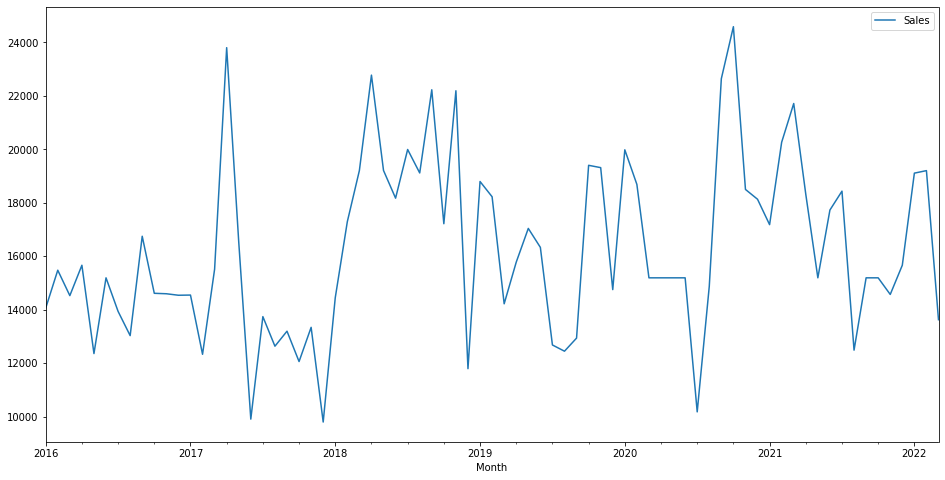

In [18]:
df.plot(figsize=(16,8))

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(df['Sales'])

In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
adfuller_test(df['Sales'])

ADF Test Statistic : -5.520051243306661
p-value : 1.886553086397335e-06
#Lags Used : 0
Number of Observations Used : 74
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Model

In [23]:
df_train = df[0:70]
df_test = df[69:75]
df_test

,Sales
Month,
2021-10-01,15190
2021-11-01,14568
2021-12-01,15661
2022-01-01,19108
2022-02-01,19202
2022-03-01,13623


In [24]:
from pmdarima.arima import auto_arima

In [25]:
stepwise_model = auto_arima(df_train.Sales, start_p=1, start_q=1, max_p=5, max_q=3, m=7, start_P=0, 
                            seasonal=True, d=1, D=1, trace=True, suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1206.325, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1233.210, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1223.223, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=1226.886, Time=0.07 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=1215.176, Time=0.35 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=1218.657, Time=0.15 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=1210.639, Time=0.31 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=1207.514, Time=0.34 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1212.235, Time=0.24 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(2,1,0)(0,1,1)[7]             : AIC=1207.118, Time=0

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

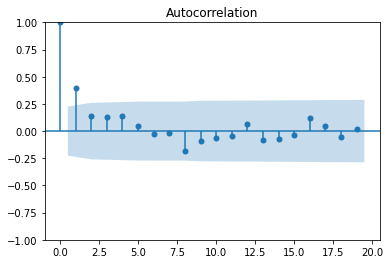

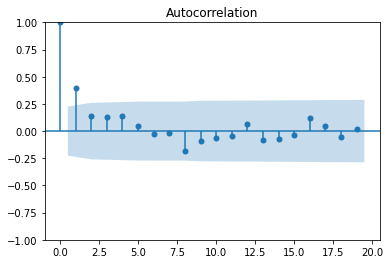

In [27]:
plot_acf(df)

C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


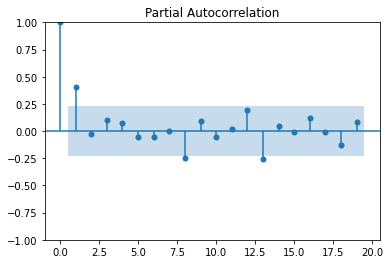

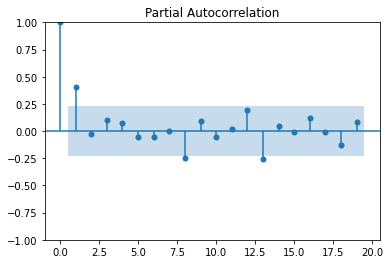

In [28]:
plot_pacf(df)

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
model=ARIMA(df_train['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

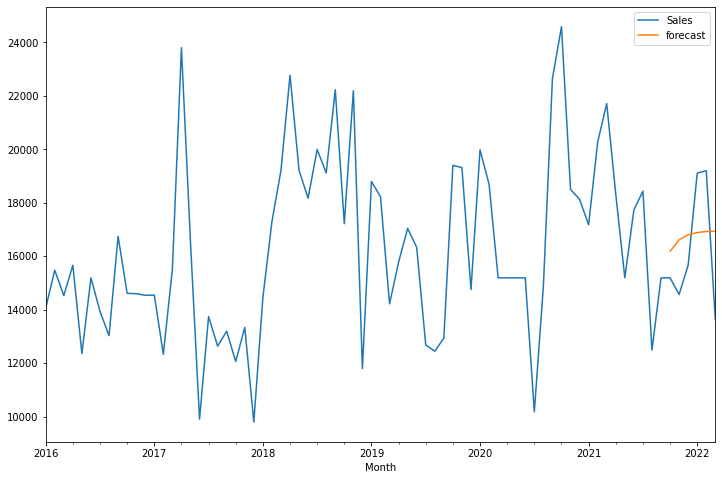

In [31]:
df['forecast']=model_fit.predict(start=69,end=74,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [32]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    16612.793507
2021-12-01    16802.219968
2022-01-01    16885.088475
2022-02-01    16921.341010
2022-03-01    16937.200428
Name: forecast, Length: 75, dtype: float64

In [33]:
d = df.forecast.dropna()
d

Month
2021-10-01    16179.789641
2021-11-01    16612.793507
2021-12-01    16802.219968
2022-01-01    16885.088475
2022-02-01    16921.341010
2022-03-01    16937.200428
Name: forecast, dtype: float64

In [34]:
df.Sales[69:75]

Month
2021-10-01    15190
2021-11-01    14568
2021-12-01    15661
2022-01-01    19108
2022-02-01    19202
2022-03-01    13623
Name: Sales, dtype: int64

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt

In [37]:
error = mean_squared_error(df.Sales[69:75],d)
error

4598318.765171989

In [38]:
df_error = sqrt(mean_squared_error(df.Sales[69:75],d))
df_error

2144.369083243831

In [39]:
df_test = df[69:75]
df_test

,Sales,forecast
Month,,
2021-10-01,15190,16179.789641
2021-11-01,14568,16612.793507
2021-12-01,15661,16802.219968
2022-01-01,19108,16885.088475
2022-02-01,19202,16921.341010
2022-03-01,13623,16937.200428


In [40]:
import statsmodels.api as sm

In [41]:
model=sm.tsa.statespace.SARIMAX(df_train['Sales'],order=(1, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()

C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

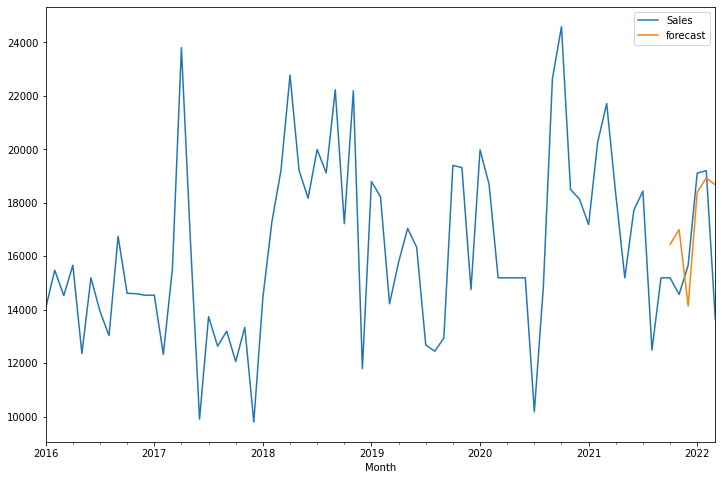

In [42]:
df['forecast']=results.predict(start=69,end=74,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [43]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    16993.429663
2021-12-01    14139.329200
2022-01-01    18399.940897
2022-02-01    18922.970378
2022-03-01    18672.701654
Name: forecast, Length: 75, dtype: float64

In [44]:
d = df.forecast.dropna()
d

Month
2021-10-01    16439.647493
2021-11-01    16993.429663
2021-12-01    14139.329200
2022-01-01    18399.940897
2022-02-01    18922.970378
2022-03-01    18672.701654
Name: forecast, dtype: float64

In [45]:
df_test = df[69:75]
df_test

,Sales,forecast
Month,,
2021-10-01,15190,16439.647493
2021-11-01,14568,16993.429663
2021-12-01,15661,14139.329200
2022-01-01,19108,18399.940897
2022-02-01,19202,18922.970378
2022-03-01,13623,18672.701654


In [46]:
error = mean_squared_error(df.Sales[69:75],d)
error

5973083.658492844

In [47]:
df_error = sqrt(mean_squared_error(df.Sales[69:75],d))
df_error

2443.9892918122296

In [48]:
df_test = df[69:75]
df_test

,Sales,forecast
Month,,
2021-10-01,15190,16439.647493
2021-11-01,14568,16993.429663
2021-12-01,15661,14139.329200
2022-01-01,19108,18399.940897
2022-02-01,19202,18922.970378
2022-03-01,13623,18672.701654


In [49]:
model=sm.tsa.statespace.SARIMAX(df_train['Sales'],order=(1, 1, 1),seasonal_order=(0,1,1,6))
results=model.fit()

C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

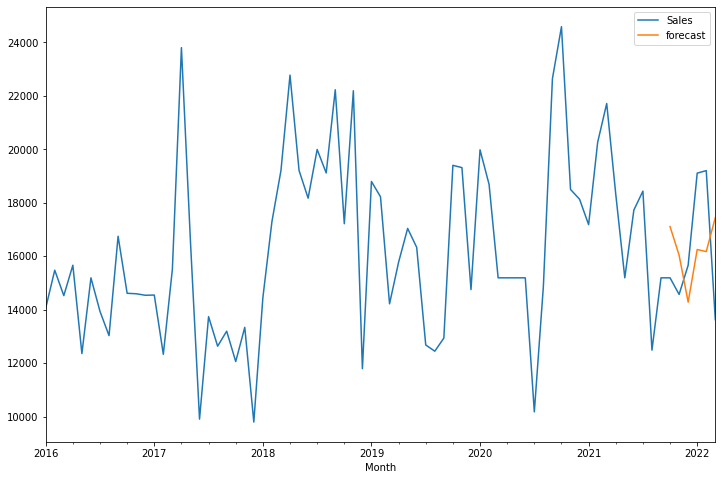

In [50]:
df['forecast']=results.predict(start=69,end=74,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [51]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    16037.809314
2021-12-01    14280.897636
2022-01-01    16249.950961
2022-02-01    16172.314274
2022-03-01    17444.302298
Name: forecast, Length: 75, dtype: float64

In [52]:
d = df.forecast.dropna()
d

Month
2021-10-01    17107.322776
2021-11-01    16037.809314
2021-12-01    14280.897636
2022-01-01    16249.950961
2022-02-01    16172.314274
2022-03-01    17444.302298
Name: forecast, dtype: float64

In [53]:
df_test = df[69:75]
df_test

,Sales,forecast
Month,,
2021-10-01,15190,17107.322776
2021-11-01,14568,16037.809314
2021-12-01,15661,14280.897636
2022-01-01,19108,16249.950961
2022-02-01,19202,16172.314274
2022-03-01,13623,17444.302298


In [54]:
error = mean_squared_error(df.Sales[69:75],d)
error

6615156.623682633

In [55]:
df_error = sqrt(mean_squared_error(df.Sales[69:75],d))
df_error

2571.994678004337

In [56]:
df_test = df[69:75]
df_test

,Sales,forecast
Month,,
2021-10-01,15190,17107.322776
2021-11-01,14568,16037.809314
2021-12-01,15661,14280.897636
2022-01-01,19108,16249.950961
2022-02-01,19202,16172.314274
2022-03-01,13623,17444.302298


In [57]:
model=sm.tsa.statespace.SARIMAX(df_train['Sales'],order=(1, 1, 1),seasonal_order=(0,1,1,3))
results=model.fit()

C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

<AxesSubplot:xlabel='Month'>

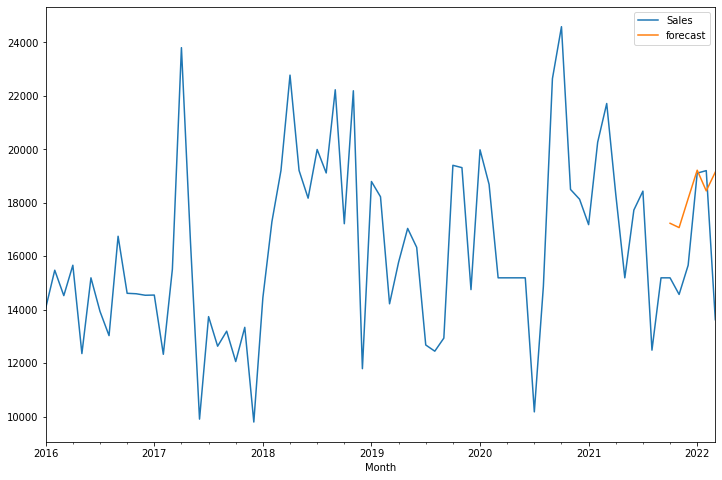

In [58]:
df['forecast']=results.predict(start=69,end=74,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [59]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    17069.910293
2021-12-01    18154.618813
2022-01-01    19217.780823
2022-02-01    18444.235896
2022-03-01    19146.445660
Name: forecast, Length: 75, dtype: float64

In [60]:
d = df.forecast.dropna()
d

Month
2021-10-01    17231.671909
2021-11-01    17069.910293
2021-12-01    18154.618813
2022-01-01    19217.780823
2022-02-01    18444.235896
2022-03-01    19146.445660
Name: forecast, dtype: float64

In [61]:
df_test = df[69:75]
df_test

,Sales,forecast
Month,,
2021-10-01,15190,17231.671909
2021-11-01,14568,17069.910293
2021-12-01,15661,18154.618813
2022-01-01,19108,19217.780823
2022-02-01,19202,18444.235896
2022-03-01,13623,19146.445660


In [62]:
error = mean_squared_error(df.Sales[69:75],d)
error

7956804.052039664

In [63]:
df_error = sqrt(mean_squared_error(df.Sales[69:75],d))
df_error

2820.7807522102216

In [64]:
df_test = df[69:75]
df_test

,Sales,forecast
Month,,
2021-10-01,15190,17231.671909
2021-11-01,14568,17069.910293
2021-12-01,15661,18154.618813
2022-01-01,19108,19217.780823
2022-02-01,19202,18444.235896
2022-03-01,13623,19146.445660
